<a href="https://colab.research.google.com/github/yohanesnuwara/FourierCNN/blob/main/fourier_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

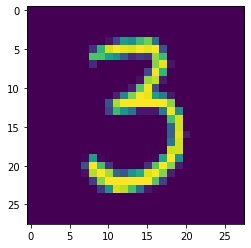

In [3]:
# Pick one digit
img = X_train[50,...]
plt.imshow(img)
plt.show()

In [4]:
# Expand dimension to fit with tensorflow operation
# Shape: (batch,height,width,channel)
img = img[np.newaxis,...,np.newaxis]

# Convert to float32 dtype
img = img.astype('float32')

img.shape

(1, 28, 28, 1)

Create 10 filter kernels. This image will be convolved with each of the kernels.

In [5]:
# Shape: (filters,height,width,channel)
tf.random.set_seed(1234)
k = tf.random.normal([10,5,5,1], dtype=tf.float32)

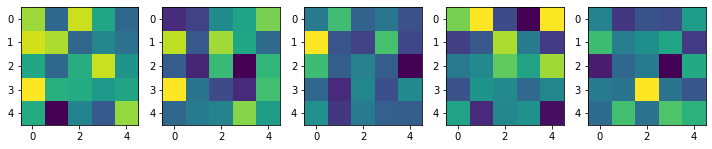

In [6]:
# Plot first 5 kernels
plt.figure(figsize=(10,10))
for i in range(k.shape[0]):
  if i<5:
    plt.subplot(1,5,i+1)
    plt.imshow(k[i,:,:,0])

plt.tight_layout()
plt.show()

Convolution operation in tensorflow

In [7]:
kt = tf.transpose(k, perm=[2,1,3,0])

kt.shape

TensorShape([5, 5, 1, 10])

In [8]:
# Transpose kernel
kt = tf.transpose(k, perm=[2,1,3,0])

# Convolve image and kernel
ret = tf.nn.conv2d(img, kt, [1,1,1,1], padding='SAME')

ret.shape

TensorShape([1, 28, 28, 10])

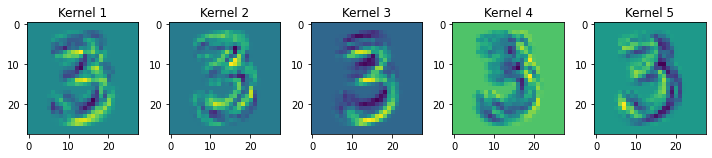

In [9]:
# Plot result of convolution with first 5 kernels
plt.figure(figsize=(10,10))
for i in range(k.shape[0]):
  if i<5:
    plt.subplot(1,5,i+1)
    plt.imshow(ret[0,:,:,i])
    plt.title(f'Kernel {i+1}')

plt.tight_layout()
plt.show()

Fast Fourier Transform (FFT) convolution

In [15]:
# New shape after FFT convolution
# Notice that new shape is BIGGER than original image
k_shape = np.array([5,5]) # kernel shape
img_shape = np.array([28,28]) # image shape

new_shape = k_shape + img_shape - 1

new_shape

array([32, 32])

In [16]:
# Transpose image and kernel
in1 = tf.transpose(img, perm=[0, 3, 1, 2])
in2 = tf.transpose(k, perm=[0, 3, 1, 2])

# FFT of image and kernel
sp1 = tf.signal.rfft2d(in1, new_shape)
sp2 = tf.signal.rfft2d(in2, new_shape)

# Multiply FFTs and inverse FFT
ret = tf.signal.irfft2d(sp1*sp2)

ret.shape

TensorShape([10, 1, 32, 32])

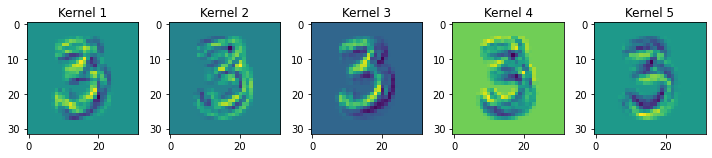

In [17]:
# Plot result of convolution with first 5 kernels
plt.figure(figsize=(10,10))
for i in range(k.shape[0]):
  if i<5:
    plt.subplot(1,5,i+1)
    plt.imshow(ret[i,0,:,:])
    plt.title(f'Kernel {i+1}')

plt.tight_layout()
plt.show()